# <u>Chapter 5: Boolean Indexing</u>
## <u>Recipes</u>
* [Calculating boolean statistics](#Calculating-boolean-statistics)
* [Constructing multiple boolean conditions](#Constructing-multiple-boolean-conditions)
* [Filtering with boolean indexing](#Filtering-with-boolean-indexing)
* [Replicating boolean indexing with index selection](#Replicating-boolean-indexing-with-index-selection)
* [Selecting with unique and sorted indexes](#Selecting-with-unique-and-sorted-indexes)
* [Gaining perspective on stock prices](#Gaining-perspective-on-stock-prices)
* [Translating SQL WHERE clauses](#Translating-SQL-WHERE-clauses)
* [Determining the normality of stock market returns](#Determining-the-normality-of-stock-market-returns)
* [Improving readability of boolean indexing with the query method](#Improving-readability-of-boolean-indexing-with-the-query-method)
* [Preserving Series with the where method](#Preserving-Series-with-the-where-method)
* [Masking DataFrame rows](#Masking-DataFrame-rows)
* [Selecting with booleans, integer location, and labels](#Selecting-with-booleans,-integer-location-and-labels)

## <u>Introduction</u>
<p>Here, rows and columns can be selected by providing a boolean value <b>(True or False)</b> for each row. These boolean values are usually stored in numpy ndarray. We will start by creating a boolean Series and calculating statistics on them then create complex conditionals before using boolean indexing on a wide variety of ways to filter data</p>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Plotly, Seaborn
%matplotlib inline

In [3]:
#We will create a boolean Series by applying a condition to a column of data then calculate summary statistics from it:
movie = pd.read_csv('data/movie.csv', index_col = 'movie_title')
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
movie.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
movie_facebook_likes           int64
d

In [153]:
movie.shape

(4916, 27)

In [5]:
#Determining whether each movie is greater than or equal to 2 hours:
movie_2_hours = movie['duration'] > 120

In [6]:
movie_2_hours

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
                                              ...  
Signed Sealed Delivered                       False
The Following                                 False
A Plague So Pleasant                          False
Shanghai Calling                              False
My Date with Drew                             False
Name: duration, Length: 4916, dtype: bool

In [7]:
movie.shape

(4916, 27)

In [8]:
#Determining the sum of movies that are longer than 2 hours:
#True = 1 and False = 0
movie_2_hours.sum()

1039

In [155]:
1039/4916*100

21.13506916192026

In [9]:
#Finding the percentage of movies greater than 2 hours:
movie_2_hours.mean()

0.2113506916192026

In [10]:
#Evaluating the percentage without the consideration of missing values:
movie['duration'].dropna().gt(120).mean()

0.21199755152009794

In [158]:
movie.sample(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
R100,Color,Hitoshi Matsumoto,72.0,99.0,17.0,16.0,Hitoshi Matsumoto,31.0,22770.0,Comedy|Drama,...,12.0,Japanese,Japan,Unrated,5500000.0,2013.0,17.0,6.1,1.85,543
Admission,Color,Paul Weitz,150.0,107.0,80.0,252.0,Sarita Choudhury,2000.0,18004225.0,Comedy|Drama|Romance,...,87.0,English,USA,PG-13,13000000.0,2013.0,257.0,5.7,2.35,5000
The Hobbit: The Battle of the Five Armies,Color,Peter Jackson,422.0,164.0,0.0,773.0,Adam Brown,5000.0,255108370.0,Adventure|Fantasy,...,802.0,English,New Zealand,PG-13,250000000.0,2014.0,972.0,7.5,2.35,65000
Meet the Deedles,Color,Steve Boyum,18.0,93.0,9.0,254.0,M.C. Gainey,23000.0,4308981.0,Comedy|Family,...,37.0,English,USA,PG,24000000.0,1998.0,284.0,3.9,NaN,839
The Spectacular Now,Color,James Ponsoldt,220.0,95.0,53.0,478.0,Jennifer Jason Leigh,8000.0,6851969.0,Comedy|Drama|Romance,...,178.0,English,USA,R,2500000.0,2013.0,1000.0,7.1,2.35,10000
The Tree of Life,Color,Terrence Malick,584.0,139.0,0.0,687.0,Tye Sheridan,11000.0,13303319.0,Drama|Fantasy,...,975.0,English,USA,PG-13,32000000.0,2011.0,1000.0,6.7,1.85,39000
The Brothers Grimm,Color,Terry Gilliam,233.0,118.0,0.0,871.0,Heath Ledger,13000.0,37899638.0,Action|Adventure|Comedy|Fantasy|Thriller,...,492.0,English,USA,PG-13,88000000.0,2005.0,13000.0,5.9,1.85,0
Megaforce,Color,Hal Needham,40.0,99.0,379.0,251.0,Michael Beck,456.0,5333658.0,Action|Sci-Fi,...,54.0,English,USA,PG,20000000.0,1982.0,278.0,3.5,1.85,0
Kung Fu Panda 2,Color,Jennifer Yuh Nelson,284.0,90.0,90.0,15.0,Gary Oldman,11000.0,165230261.0,Action|Adventure|Animation|Comedy|Family,...,209.0,English,USA,PG,150000000.0,2011.0,10000.0,7.3,2.35,20000


In [11]:
movie_2_hours.describe()

count      4916
unique        2
top       False
freq       3877
Name: duration, dtype: object

In [12]:
#Proof that the mean is the percentage of True values:
movie_2_hours.value_counts()

False    3877
True     1039
Name: duration, dtype: int64

In [13]:
movie_2_hours.value_counts(normalize = True)

False    0.788649
True     0.211351
Name: duration, dtype: float64

In [159]:
movie_2_hours.value_counts(normalize = True)*100

False    78.864931
True     21.135069
Name: duration, dtype: float64

In [14]:
#One can compare columns from the same DataFrame to produce a boolean Series
#Determining the percentage of movies that have more Facebook likes of actor 1 greater than actor 2:
movie.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [15]:
#Combine the columns you are comparing into a single DataFrame
actors = movie[['actor_1_facebook_likes', 'actor_2_facebook_likes']].dropna()

In [16]:
actors

,actor_1_facebook_likes,actor_2_facebook_likes
movie_title,,
Avatar,1000.0,936.0
Pirates of the Caribbean: At World's End,40000.0,5000.0
Spectre,11000.0,393.0
The Dark Knight Rises,27000.0,23000.0
Star Wars: Episode VII - The Force Awakens,131.0,12.0
...,...,...
Signed Sealed Delivered,637.0,470.0
The Following,841.0,593.0
A Plague So Pleasant,0.0,0.0


In [17]:
(actors['actor_1_facebook_likes'] > actors['actor_2_facebook_likes']).mean()

0.9777687130328371

## <u>Constructing multiple boolean conditions</u>
<p>Logical keywords such as <b>and, or & not</b> are not acceptable in boolean indexing. They are replaced with symbols suchas
<b>%, | </b> and <b>~</b>. Also, each expression should be wrapped in parentheses or an error will be raised. In this recipe, 
we construct multiple boolean expressions before combining them together to find all the movies that have an imdb_score
greater than 8, a content_rating of PG-13, and a title_year either before 2000 or after 2009. Indexing Boolean indexing does 
not quite work with the .iloc indexing operator. If you pass in a boolean series to it, an exception will get raised. However, 
if you pass in a boolean ndarray it will the same as it does in this recipe with the other indexers.</p>

In [18]:
movie.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [19]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [20]:
#Create a variable to hold each set of criteria independently as boolean Series:

criteria1 = movie.imdb_score > 8
criteria2 = movie.content_rating == 'PG=13'

#criteterax = ((cond1) arithmetic_operator (cond2)...)

criteria3 = ((movie.title_year < 2000) | (movie.title_year > 2009))

In [21]:
#Combine all of the three criteria into a single boolean Series:
criteria_final = criteria1 & criteria2 & criteria3
criteria_final

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                         False
Star Wars: Episode VII - The Force Awakens    False
                                              ...  
Signed Sealed Delivered                       False
The Following                                 False
A Plague So Pleasant                          False
Shanghai Calling                              False
My Date with Drew                             False
Length: 4916, dtype: bool

In [22]:
criteria_final.sum()

0

In [166]:
criteria_test = criteria2

In [167]:
criteria_test.sum()

1022

<p>Many objects in Python have boolean representation. For instance, all integers except 0 are considered True. All strings 
except the empty stringare True. All non-empty sets, tuples, dictionaries, and lists are True. An empty DataFrame or Series
doesnot evaluate as True or False and instead an error is raised. In general, to retrieve the truthiness of a Python object, 
pass it to the bool function.</p>

## <u>Filtering with boolean indexing</u>
<p>This recipe constructs two complex and independent boolean criteria for different sets of movies. The first set of movies comes from the previous recipe and consists of those with an <i>imdb_score</i> greater than 8, a content_rating of <i>PG-13</i>, and a <i>title_year</i> either before 2000 or after 2009. The second set of movies consists of those with <i>imdb_score</i> less than 5, a <i>content_rating</i> of <i>R</i>, and a <i>title_year</i> between 2000 and 2010.</p>

In [23]:
crit_a1 = movie.imdb_score > 8
crit_a2 = movie.content_rating == 'PG-13'
crit_a3 = (movie.title_year < 2000) | (movie.title_year > 2009)
final_crit_a = crit_a1 & crit_a2 & crit_a3

In [24]:
#Create a criteria for the second set of movies:
crit_b1 = movie.imdb_score < 5
crit_b2 = movie.content_rating == 'R'
crit_b3 = ((movie.title_year >= 2000) & (movie.title_year <= 2010))
final_crit_b = crit_b1 & crit_b2 & crit_b3

In [25]:
#Combine the two sets of criteria using the or operator:
final_crit_all = final_crit_a | final_crit_b

In [26]:
#Pass the final criteria to the initial dataset:
movie[final_crit_all].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000
Interstellar,Color,Christopher Nolan,712.0,169.0,22000.0,6000.0,Anne Hathaway,11000.0,187991439.0,Adventure|Drama|Sci-Fi,...,2725.0,English,USA,PG-13,165000000.0,2014.0,11000.0,8.6,2.35,349000


In [169]:
g = movie[final_crit_all]
g.shape

(86, 27)

In [27]:
#Let us filter the rows and columns with the loc indexer:
cols = ['imdb_score', 'content_rating', 'title_year']
movie_filtered = movie.loc[final_crit_all, cols]
movie_filtered.head(10)

,imdb_score,content_rating,title_year
movie_title,,,
The Dark Knight Rises,8.5,PG-13,2012.0
The Avengers,8.1,PG-13,2012.0
Captain America: Civil War,8.2,PG-13,2016.0
Guardians of the Galaxy,8.1,PG-13,2014.0
Interstellar,8.6,PG-13,2014.0
Inception,8.8,PG-13,2010.0
The Martian,8.1,PG-13,2015.0
Town & Country,4.4,R,2001.0
Sex and the City 2,4.3,R,2010.0


In [170]:
movie_filtered.shape

(86, 3)

In [28]:
#CHAINING
#It is possible to use one long boolean expression in place of several other shorter ones.
#To replicate the final_crit_a variable from step 1 with one long line of code, we can do the following:
final_crit_a2 = (movie.imdb_score > 8) & \
                (movie.content_rating == 'PG-13') & \
                ((movie.title_year < 2000) | \
                (movie.title_year > 2009))

In [29]:
final_crit_a2.equals(final_crit_a)

True

## <u>Replicating boolean indexing with index selection</u>

In [30]:
#The index position can be taken advantage of to replicate specific cases of boolean selection
#This method is more intuitive and has a lot of ease for readability
#We will select all instutions of a particular state with boolean indexing and index selection
college = pd.read_csv('data/college.csv')

In [31]:
#Use boolean indexing to select all institutions from the state of Texas:
college[college['STABBR'] == 'TX'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,TX,0.0,0.0,0.0,0,475.0,490.0,0.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [32]:
#To replicate this using the index selection method, we make STABBR to be the index:
#index_col
college2 = college.set_index('STABBR')
college2.head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
AL,Alabama A & M University,Normal,1.0,0.0,0.0,0,424.0,420.0,0.0,4206.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
AL,University of Alabama at Birmingham,Birmingham,0.0,0.0,0.0,0,570.0,565.0,0.0,11383.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
AL,Amridge University,Montgomery,0.0,0.0,0.0,1,NaN,NaN,1.0,291.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
AL,University of Alabama in Huntsville,Huntsville,0.0,0.0,0.0,0,595.0,590.0,0.0,5451.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
AL,Alabama State University,Montgomery,1.0,0.0,0.0,0,425.0,430.0,0.0,4811.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5


In [33]:
college2.loc['TX'].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [34]:
#Comparison of both methods:
%timeit college[college['STABBR'] == 'TX']

2.1 ms ± 222 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [35]:
%timeit college2.loc['TX']

896 µs ± 48.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [36]:
#We can also add the index creation time to the second time calculation:
%timeit college2 = college.set_index('STABBR')

2.71 ms ± 180 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [37]:
#Selection of multiple states with both boolean and index selection:
states = ['TX', 'CA', 'NY']
college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
0,Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
1,University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
2,Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
3,University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
4,Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5


In [171]:
states = ['TX', 'CA', 'NY']

m2 = college[college['STABBR'].isin(states)]
m2.sample(10)

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"Houston, TX",Jay's Technical Institute,Houston,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.2969,1,0.9916,0.9916,0.6094,12200,9500
"Stony Brook, NY",Stony Brook University,Stony Brook,NY,0.0,0.0,0.0,0,590.0,660.0,0.0,...,0.0237,0.1142,0.0714,0.0635,1,0.3351,0.4496,0.0891,55000,19351
"Austin, TX",Baldwin Beauty School-North Austin,Austin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0556,0.0000,1,0.5827,0.0000,0.4304,20700,PrivacySuppressed
"Barrytown, NY",Unification Theological Seminary,Barrytown,NY,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0909,0.1818,0.1515,NaN,1,NaN,NaN,0.3158,NaN,PrivacySuppressed
"Barstow, CA",Barstow Community College,Barstow,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0560,0.0019,0.0063,0.7513,1,0.4902,0.0000,0.5086,31700,PrivacySuppressed
"Levittown, NY",Long Island Nail & Skin Care Institute,Levittown,NY,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0483,0.5931,1,0.3244,0.4046,0.7122,NaN,6333
"Fontana, CA",Salon Success Academy-Fontana,Fontana,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0172,0.0172,0.0000,0.0000,1,0.9495,0.7778,0.2407,PrivacySuppressed,10556
"Fresno, CA",San Joaquin Valley College-Fresno,Fresno,CA,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,18192
"Concord, CA",Heald College-Concord,Concord,CA,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0520,0.0000,0.1740,0.1707,0,0.7539,0.7795,0.4637,38600,11676
"New York, NY",Pratt Manhattan-A Division of Pratt Institute,New York,NY,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,40900,26691


In [39]:
college2.loc[states]

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NY,Briarcliffe College–Patchogue,Patchogue,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,38200,28720.5
NY,Jamestown Business College -,Salamanca,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,12050
NY,Pratt Manhattan-A Division of Pratt Institute,New York,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,40900,26691


## <u>Selecting with unique and sorted indexes</u>
<p>The performance is faster when the index is sorted or is unique. If there are duplicates, the code will be slower and makes 
a lot of selections. Here, we will form a unique or sorted index to increase performance of index selection. Then, we will 
compare the performance between boolean and indexing as well</p>

In [40]:
college2 = college.set_index('STABBR')
college2.head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
AL,Alabama A & M University,Normal,1.0,0.0,0.0,0,424.0,420.0,0.0,4206.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
AL,University of Alabama at Birmingham,Birmingham,0.0,0.0,0.0,0,570.0,565.0,0.0,11383.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
AL,Amridge University,Montgomery,0.0,0.0,0.0,1,NaN,NaN,1.0,291.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
AL,University of Alabama in Huntsville,Huntsville,0.0,0.0,0.0,0,595.0,590.0,0.0,5451.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
AL,Alabama State University,Montgomery,1.0,0.0,0.0,0,425.0,430.0,0.0,4811.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5


In [41]:
college2.index.is_monotonic

False

In [42]:
college3 = college2.sort_index()

In [43]:
college3.index.is_monotonic

True

In [44]:
#Time the selection of the state of Texas(TX) from all the three DataFrames:
%timeit college[college['STABBR'] == 'TX']

1.98 ms ± 88.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [45]:
%timeit college2.loc['TX']

1.29 ms ± 132 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [46]:
%timeit college3.loc['TX']

195 µs ± 82.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [172]:
college.shape

(7535, 27)

In [175]:
college.nunique()

INSTNM                7535
CITY                  2514
STABBR                  59
HBCU                     2
MENONLY                  2
WOMENONLY                2
RELAFFIL                 2
SATVRMID               163
SATMTMID               167
DISTANCEONLY             2
UGDS                  2932
UGDS_WHITE            4397
UGDS_BLACK            3242
UGDS_HISP             2809
UGDS_ASIAN            1254
UGDS_AIAN              601
UGDS_NHPI              363
UGDS_2MOR              957
UGDS_NRA               920
UGDS_UNKN             1517
PPTUG_EF              3420
CURROPER                 2
PCTPELL               4422
PCTFLOAN              4155
UG25ABV               4285
MD_EARN_WNE_P10        598
GRAD_DEBT_MDN_SUPP    2038
dtype: int64

In [47]:
#Let us now turn towards unique indexes. For this, we use the institution name as the index:
college_unique = college.set_index('INSTNM')

In [48]:
college_unique.head()

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,4206.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,11383.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,291.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,5451.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,4811.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5


In [49]:
college_unique.index.is_unique

True

In [50]:
#Let us select Stanford University with boolean indexing:
college[college['INSTNM'] == 'Stanford University']

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4217,Stanford University,Stanford,CA,0.0,0.0,0.0,0,730.0,745.0,0.0,...,0.1067,0.0819,0.0031,0.0,1,0.1556,0.1256,0.0401,86000,12782


In [51]:
#Let us select Stanford University with index selection:
college_unique.loc['Stanford University']

CITY                  Stanford
STABBR                      CA
HBCU                       0.0
MENONLY                    0.0
WOMENONLY                  0.0
RELAFFIL                     0
SATVRMID                 730.0
SATMTMID                 745.0
DISTANCEONLY               0.0
UGDS                    7018.0
UGDS_WHITE              0.3752
UGDS_BLACK              0.0591
UGDS_HISP               0.1607
UGDS_ASIAN              0.1979
UGDS_AIAN               0.0114
UGDS_NHPI               0.0038
UGDS_2MOR               0.1067
UGDS_NRA                0.0819
UGDS_UNKN               0.0031
PPTUG_EF                   0.0
CURROPER                     1
PCTPELL                 0.1556
PCTFLOAN                0.1256
UG25ABV                 0.0401
MD_EARN_WNE_P10          86000
GRAD_DEBT_MDN_SUPP       12782
Name: Stanford University, dtype: object

In [52]:
college_unique.loc['Stanford University'].to_frame()

,Stanford University
CITY,Stanford
STABBR,CA
HBCU,0.0
MENONLY,0.0
WOMENONLY,0.0
RELAFFIL,0
SATVRMID,730.0
SATMTMID,745.0
DISTANCEONLY,0.0
UGDS,7018.0


In [53]:
#They produce the same data with different approaches. Let us time each approach:
%timeit college[college['INSTNM'] == 'Stanford University']

3.05 ms ± 851 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [54]:
%timeit college_unique.loc['Stanford University'].to_frame()

888 µs ± 138 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [55]:
#Pandas implements unique indexes with a hash table, which makes for even faster selection
%timeit college_unique.loc['Stanford University']

439 µs ± 83.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [56]:
#We can set the index equal to the concatenation od the city and state columns:
college.index = college['CITY'] + ', ' + college['STABBR']
college = college.sort_index()
college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"ARTESIA, CA",Angeles Institute,ARTESIA,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0175,0.0088,0.0088,0.0000,1,0.6275,0.8138,0.5429,NaN,16850
"Aberdeen, SD",Presentation College,Aberdeen,SD,0.0,0.0,0.0,1,440.0,480.0,0.0,...,0.0284,0.0142,0.0823,0.2865,1,0.4829,0.7560,0.3097,35900,25000
"Aberdeen, SD",Northern State University,Aberdeen,SD,0.0,0.0,0.0,0,480.0,475.0,0.0,...,0.0219,0.0425,0.0024,0.1872,1,0.2272,0.4303,0.1766,33600,24847
"Aberdeen, WA",Grays Harbor College,Aberdeen,WA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0937,0.0009,0.0250,0.1820,1,0.4530,0.1502,0.5087,27000,11490
"Abilene, TX",Hardin-Simmons University,Abilene,TX,0.0,0.0,0.0,1,508.0,515.0,0.0,...,0.0298,0.0159,0.0102,0.0685,1,0.3256,0.5547,0.0982,38700,25864


In [57]:
#We can now select colleges from particular cities and states without boolean indexing
#Let us now select all colleges from Miami, FL
college.loc['Miami, FL'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"Miami, FL",New Professions Technical Institute,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.4464,1,0.8701,0.6780,0.8358,18700,8682
"Miami, FL",Management Resources College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.0000,1,0.4239,0.5458,0.8698,PrivacySuppressed,12182
"Miami, FL",Strayer University-Doral,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,49200,36173.5
"Miami, FL",Keiser University- Miami,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,29700,26063
"Miami, FL",George T Baker Aviation Technical College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0046,0.0,0.0,0.5686,1,0.2567,0.0000,0.4366,38600,PrivacySuppressed


In [58]:
#We can compare the speed of this compound index selection with boolean indexing.
crit1 = college['CITY'] == 'Miami'
crit2 = college['STABBR'] == 'FL'

In [59]:
%timeit college[crit1 & crit2]

719 µs ± 59.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [60]:
%timeit college.loc['Miami, FL']

180 µs ± 23.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## <u>Gaining perspective on stock prices</u>
<p>Investors who have purchased long stock positions would obviously like to sell stocks at or near their all-time highs. 
This, of course, is very difficult to do in practice, especially if a stock price has only spent a small portion of its 
history above a certain threshold. We can use boolean indexing to find all points in time that a stock has spent above or
below a certain value. This exercise may help us gain perspective as to what a common range for some stock to be trading 
within.</p>
<p>In this recipe, we examine Schlumberger stock from the start of 2010 until mid-2017. We use boolean indexing to extract a 
Series of the lowest and highest ten percent of closing prices during this time period. We then plot all points and highlight 
those that are in the upper and lower ten percent.</p>

In [61]:
#1. Read in the Schlumberger stock data, put the Date column into the index, and convert it to a DatetimeIndex:
slb = pd.read_csv('data/slb_stock.csv', index_col = 'Date', parse_dates = ['Date'])

In [62]:
slb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,66.39,67.20,66.12,67.11,5771234
2010-01-05,66.99,67.62,66.73,67.30,7366270
2010-01-06,67.17,68.94,67.03,68.80,9949946
2010-01-07,68.49,69.81,68.21,69.51,7700297
2010-01-08,69.19,72.00,69.09,70.65,13487621


In [63]:
#Selecting closing price as a Series then do some statistics on it:
slb_close = slb['Close']
slb_close.head()

Date
2010-01-04    67.11
2010-01-05    67.30
2010-01-06    68.80
2010-01-07    69.51
2010-01-08    70.65
Name: Close, dtype: float64

In [64]:
slb2 = slb_close.sort_index().to_frame()

In [65]:
slb_summary = slb_close.describe(percentiles = [0.1, 0.9]).to_frame()
slb_summary

,Close
count,1895.000000
mean,79.121905
std,11.767802
min,51.750000
10%,64.892000
50%,78.000000
90%,93.248000
max,117.950000


In [177]:
slb2.head()

,Close
Date,
2010-01-04,67.11
2010-01-05,67.30
2010-01-06,68.80
2010-01-07,69.51
2010-01-08,70.65


In [66]:
#Select all closing prices in the upper and lower tenth percentile via the boolean selection method:
upper_10 = slb2['Close'] > 93.248000
lower_10 = slb2['Close'] < 64.892000
criteria = upper_10 | lower_10
slb_top_bottom_10 = slb2[criteria]

In [67]:
slb_top_bottom_10.sample(30)

,Close
Date,
2010-03-19,64.32
2014-08-15,106.53
2014-05-12,100.29
2013-10-18,93.99
2010-10-08,63.56
2012-06-27,61.47
2010-07-28,59.73
2013-10-29,94.00
2010-05-14,64.88


In [68]:
slb2.head()

,Close
Date,
2010-01-04,67.11
2010-01-05,67.30
2010-01-06,68.80
2010-01-07,69.51
2010-01-08,70.65


In [69]:
slb2[upper_10].shape

(190, 1)

In [70]:
slb2[lower_10].shape

(190, 1)

## <u>Translating SQL where clauses</u>
<p>Pandas has the ability to connect to databases and send SQL statements to them. We will write Pandas code that is equivalent to SQL statements</p>

In [71]:
employee = pd.read_csv('data/employee.csv')

In [72]:
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [180]:
638+384

1022

In [73]:
#Filtering columns to know the exact values that will be used in the filter:
employee.DEPARTMENT.value_counts()

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Parks & Recreation                 74
Solid Waste Management             43
Library                            36
Fleet Management Department        36
Admn. & Regulatory Affairs         29
Municipal Courts Department        28
Human Resources Dept.              24
Houston Emergency Center (HEC)     23
Housing and Community Devp.        22
General Services Department        22
Legal Department                   17
Dept of Neighborhoods (DON)        17
City Council                       11
Finance                            10
Houston Information Tech Svcs       9
Planning & Development              7
City Controller's Office            5
Mayor's Office                      5
Convention and Entertainment        1
Name: DEPARTMENT, dtype: int64

In [74]:
employee.GENDER.value_counts()

Male      1397
Female     603
Name: GENDER, dtype: int64

In [178]:
#Write a single statement for each of the criteria. Use the isin method to test equality to one of many values:
depts = ['Houston Police Department-HPD', 'Houston Fire Department (HFD)']
criteria_depts = employee.DEPARTMENT.isin(depts)
criteria_depts

0       False
1       False
2        True
3        True
4       False
        ...  
1995     True
1996     True
1997     True
1998     True
1999     True
Name: DEPARTMENT, Length: 2000, dtype: bool

In [179]:
employee[criteria_depts]

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
5,5,SENIOR POLICE OFFICER,Houston Police Department-HPD,66614.0,Black or African American,Full Time,Male,Active,1984-11-26,2005-03-26
10,10,FIRE FIGHTER,Houston Fire Department (HFD),52644.0,Hispanic/Latino,Full Time,Male,Active,2007-05-21,2008-11-15
14,14,POLICE SERGEANT,Houston Police Department-HPD,77076.0,Black or African American,Full Time,Male,Active,2001-06-04,2015-05-25
...,...,...,...,...,...,...,...,...,...,...
1995,1995,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-06-09,2015-06-09
1996,1996,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),66523.0,Black or African American,Full Time,Male,Active,2003-09-02,2013-10-06
1997,1997,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-10-13,2015-10-13
1998,1998,POLICE OFFICER,Houston Police Department-HPD,55461.0,Asian/Pacific Islander,Full Time,Male,Active,2009-01-20,2011-07-02


In [76]:
criteria2 = employee['DEPARTMENT'].isin(depts)

In [77]:
criteria2.equals(criteria_depts)

True

In [78]:
criteria_gender = employee['GENDER'] == 'Female'

In [79]:
criteria_sal = (employee.BASE_SALARY >= 80000) & (employee.BASE_SALARY <= 120000)

In [80]:
criteria_final = (criteria_depts &
                criteria_gender &
                criteria_sal)

In [81]:
#Using boolean indexing to select the rows that meet the final criteria
select_columns = ['UNIQUE_ID', 'DEPARTMENT', 'GENDER', 'BASE_SALARY']

In [82]:
filter1 = employee.loc[criteria_final, select_columns]
filter1

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0
564,564,Houston Police Department-HPD,Female,81239.0
595,595,Houston Police Department-HPD,Female,99953.0
937,937,Houston Police Department-HPD,Female,81239.0
954,954,Houston Police Department-HPD,Female,91181.0
1118,1118,Houston Police Department-HPD,Female,104455.0


In [83]:
#An alternative code syntax can be:
criteria_sal2 = employee.BASE_SALARY.between(80000, 120000)

In [84]:
criteria_final2 = (criteria_depts &
                criteria_gender &
                criteria_sal2)

In [85]:
filter2 = employee.loc[criteria_final, select_columns]

In [86]:
filter2.equals(filter1)

True

In [87]:
#Excluding rows from the top 5 most frequent occuring departments:
top_5_depts = employee.DEPARTMENT.value_counts().index[:5]

In [88]:
top_5_depts2 = employee.DEPARTMENT.value_counts().head(5)

In [89]:
top_5_depts

Index(['Houston Police Department-HPD', 'Houston Fire Department (HFD)',
       'Public Works & Engineering-PWE', 'Health & Human Services',
       'Houston Airport System (HAS)'],
      dtype='object')

In [90]:
top_5_depts2

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Name: DEPARTMENT, dtype: int64

In [183]:
criteriaX = ~employee['DEPARTMENT'].isin(top_5_depts)

In [184]:
employee[criteriaX]

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22
18,18,MAINTENANCE MECHANIC III,General Services Department,40581.0,Hispanic/Latino,Full Time,Male,Active,2008-12-29,2008-12-29
32,32,SENIOR ACCOUNTANT,Finance,46963.0,Black or African American,Full Time,Male,Active,1991-02-11,2016-02-13
...,...,...,...,...,...,...,...,...,...,...
1976,1976,SENIOR SIDELOADER OPERATOR,Solid Waste Management,34466.0,Hispanic/Latino,Full Time,Female,Active,2015-07-20,2016-01-30
1983,1983,ADMINISTRATIVE SPECIALIST,Admn. & Regulatory Affairs,55172.0,Black or African American,Full Time,Female,Active,2006-10-16,2006-10-16
1985,1985,TRUCK DRIVER,Fleet Management Department,30222.0,Black or African American,Full Time,Male,Active,2013-06-10,2015-08-01
1988,1988,SENIOR ASSISTANT CITY ATTORNEY II,Legal Department,124115.0,White,Full Time,Male,Active,2013-01-23,2013-03-02


## <u>Determining the normality of stock market returns</u>
<p>Normal distribution is highly relied upon in data description. Most real-life datasets eg. Stock market prices appear to have normal distributions but are actually far off. We will demostrate how to find daily stock returns of Amazon and test whether they follow a normal distribution</p>

In [93]:
amzn = pd.read_csv('data/amzn_stock.csv', index_col = 'Date', parse_dates = ['Date'])

In [94]:
amzn.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [95]:
#Taking the closing price to a Series then use pct_change to get the daily rate return:
amzn_daily_return = amzn['Close'].pct_change()
amzn_daily_return.head()

Date
2010-01-04         NaN
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
Name: Close, dtype: float64

In [96]:
#Drop missing values and plot a histogram to visualize the distribution:
amzn_daily_return.isnull().mean()

0.0005274261603375527

In [97]:
amzn_daily_return.isnull().sum()

1

In [98]:
amzn_daily_return.shape

(1896,)

In [99]:
amzn_daily_return.count()

1895

In [100]:
amzn_daily_return = amzn_daily_return.dropna()
amzn_daily_return

Date
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
2010-01-11   -0.024041
                ...   
2017-07-11   -0.002348
2017-07-12    0.012453
2017-07-13   -0.005842
2017-07-14    0.001179
2017-07-17    0.008215
Name: Close, Length: 1895, dtype: float64

<AxesSubplot:>

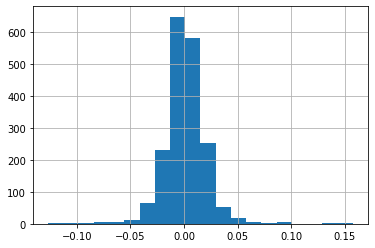

In [101]:
amzn_daily_return.hist(bins=20)

<p>Normal distributions approximately follow the 68-95-99.7 rule--meaning that 68% of the data falls between 1 standard 
deviation of the mean, 95% between 2, and 99.7% between 3. We will now calculate the percentage of daily returns that fall
between 1, 2, and 3 standard deviations from the mean. For this, we will need the mean and standard deviation:</p>

In [102]:
mean = amzn_daily_return.mean()
std = amzn_daily_return.std()

In [103]:
#Calculate the absolute value of the z-score for each observation. 
#The z-score is the number of standard deviations away from the mean:
#abs_z_score = amzn_daily_return.sub(mean).abs().div(std)

In [104]:
#pcts = [abs_z_score.lt(i).mean() for i in range(1,4)print({:.3f} 'fall within 1 standard deviation').format(*pcts)

In [105]:
#print('{:.3f} fall within 1 standard deviation. ''{:.3f} within 2 and {:.3f} within 3'.format(*pcts))

0.742 fall within 1 standard deviation. 0.946 within 2 and 0.986 within 3


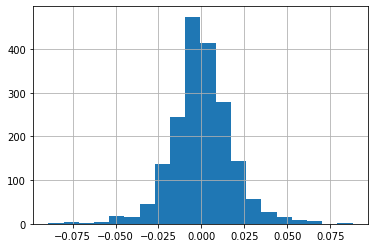

In [106]:
def test_return_normality(stock_data):
    close = stock_data['Close']
    daily_return = close.pct_change().dropna()
    daily_return.hist(bins=20)
    mean = daily_return.mean()
    std = daily_return.std()
    abs_z_score = abs(daily_return - mean) / std
    pcts = [abs_z_score.lt(i).mean() for i in range(1,4)]
    print('{:.3f} fall within 1 standard deviation. '
    '{:.3f} within 2 and {:.3f} within 3'.format(*pcts))
    slb = pd.read_csv('data/slb_stock.csv', index_col='Date',
    parse_dates=['Date'])
test_return_normality(slb)

## <u>Improving readability of boolean indexing with the query method</u>
<p>Pandas has an alternative string-based syntax through the DataFrame <b>query</b> method that can provide more clarity. It is
not as capable as boolean indexing and should not be used for production code. Here, we will also translate SQL clauses to 
filter employee data for female employees from the police or fire departments that earn a salary between 80 and 120 thousand
dollars.</p>

In [107]:
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [108]:
employee.shape

(2000, 10)

In [109]:
depts = ['Houston Police Department-HPD', 'Houston Fire Department (HFD)']
select_columns = ['UNIQUE_ID', 'DEPARTMENT', 'GENDER', 'BASE_SALARY']

In [110]:
#Build a query string and execute the method:
#Python variables are referenced beginning with @
#Inner quotes are used to hold string variables
qs = "DEPARTMENT in @depts " \
     "and GENDER == 'Female' " \
     "and 80000 <= BASE_SALARY <= 120000"
emp_filtered = employee.query(qs)
emp_filtered[select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


In [111]:
#Writing a program for the top 10 department names
#Finding all females that were not a member of the top 10 departments by frequency:
top10_depts = employee.DEPARTMENT.value_counts() \
                                 .index[:10].tolist()
qs = "DEPARTMENT not in @top10_depts and GENDER == 'Female'"
employee_filtered2 = employee.query(qs)
employee_filtered2.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
73,73,ADMINISTRATIVE SPECIALIST,Human Resources Dept.,55939.0,Black or African American,Full Time,Female,Active,2011-12-19,2013-11-23
96,96,ASSISTANT CITY CONTROLLER III,City Controller's Office,59077.0,Asian/Pacific Islander,Full Time,Female,Active,2013-06-10,2013-06-10
117,117,SENIOR ASSISTANT CITY ATTORNEY I,Legal Department,90957.0,Black or African American,Full Time,Female,Active,1998-03-20,2012-07-21
146,146,SENIOR STAFF ANALYST,Houston Information Tech Svcs,74951.0,White,Full Time,Female,Active,2014-03-17,2014-03-17


## <u>Preserving Series with the where method</u>
<p>Boolean indexing necessarily filters your dataset by removing all the rows that do not match the criteria. Instead of
dropping all these values, it is possible to keep them using the where method. The where method preserves the size of your 
Series or DataFrame and either sets the values that do not meet the criteria to missing or replaces them with something else. Here, we pass the where method boolean conditions to put a floor and ceiling on the minimum and maximum number of Facebook likes for actor 1 in the movie dataset.</p>

In [112]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [113]:
#Select all values in the actor_1_facebook_likes that are not missing:
fb_likes = movie['actor_1_facebook_likes'].dropna()
fb_likes.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [114]:
#Let us use the describe method to get a sense of the distribution:
fb_likes.describe(percentiles = [.1, .25, .5, .75, .9]).astype(int)

#fb_likes.describe(include = ['int']).astype(int)

count      4909
mean       6494
std       15106
min           0
10%         240
25%         607
50%         982
75%       11000
90%       18000
max      640000
Name: actor_1_facebook_likes, dtype: int32

<AxesSubplot:>

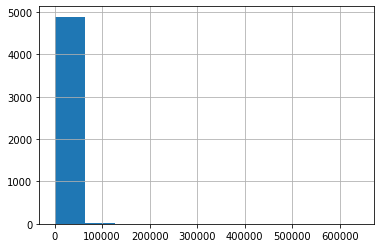

In [115]:
#We can plot a histogram for the distribution:
fb_likes.hist()

In [116]:
#The visualization is not that good. 
#The summary statistics tells us that the data is skewed to  the right with many observations
#The order of magnitude is greater than the median. 
#Let us create a criteria to test whether the number of likes is less than 20000
criteria_high = fb_likes < 20000
criteria_high.mean().round(2)

0.91

In [117]:
#About 91% had actors with less than 20000 facebook likes
#The default behavior is to return a Series the same size as the original but which has all the False locations replaced with a missing value:
fb_likes.where(criteria_high).head()

#fb_likes[criteria_high].head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End          NaN
Spectre                                       11000.0
The Dark Knight Rises                             NaN
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [118]:
fb_likes.shape

(4909,)

In [119]:
#Changing the missing values using the other parameter
fb_likes.where(criteria_high, other = 20000).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [120]:
#We can put a floor on the minimum number of likes 
#We can chain another where method and replace the values not meeting the condition to 300:
criteria_low = fb_likes > 300
fb_like_cap = fb_likes.where(criteria_high, other = 20000)\
                      .where(criteria_low, 300)
fb_like_cap.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      300.0
Name: actor_1_facebook_likes, dtype: float64

In [121]:
#The length of the original and modified Series are the same:
len(fb_likes), len(fb_like_cap)

(4909, 4909)

<AxesSubplot:>

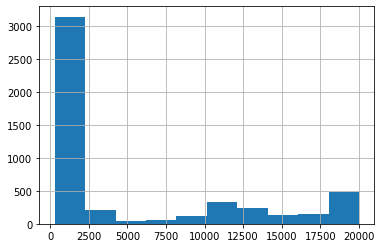

In [122]:
#Plotting histogram with the modified Series. The data has a much tighter range, it should produce a better plot:
fb_like_cap.hist()

<p>Pandas actually has built-in methods clip, clip_lower, and clip_upper that replicate this operation. The clip method can 
set a floor and ceiling at the same time. We also checkwhether this alternate method produces the exact same Series, which it
does</p>

In [123]:
fb_likes_cap2 = fb_likes.clip(lower = 300, upper = 20000)
fb_likes_cap2.equals(fb_like_cap)

True

## <u>Masking DataFrame rows</u>
<p>The mask method does the opposite of the where method. It creates missing values where boolean conditions are true. We will
mask. Here, we will mask all rows of movies that were made after 2010 and then filter all rows with missing values</p>

In [124]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [125]:
c1 = movie['title_year'] >= 2010
c2 = movie['title_year'].isnull()
criteria = c1 | c2

In [126]:
#Use the mask method to make all movies that were from 2010 onwards missing:
movie.mask(criteria).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spectre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Dark Knight Rises,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
#Chain the dropna method to remove rows with missing values:
movie_mask = movie.mask(criteria).dropna(how = 'all')

In [128]:
movie_mask.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0.0
Harry Potter and the Half-Blood Prince,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000.0
Superman Returns,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,...,2367.0,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0.0


In [129]:
#The above method is complex. Here is a shorter method:
movie_boolean = movie[movie['title_year'] < 2010]

In [130]:
movie_boolean.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
Harry Potter and the Half-Blood Prince,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000
Superman Returns,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,...,2367.0,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0


In [131]:
#Comparison of the two methods:
movie_mask.equals(movie_boolean)

False

In [132]:
#Let us do some sanity check on their shape
movie_mask.shape == movie_boolean.shape

True

In [133]:
#The mask method creates missing values which are of the float data type. 
#Therefore, any integer column value is now a float 
#The data types are therefore different even when the values are the same
movie_mask.dtypes == movie_boolean.dtypes

color                         True
director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                        True
actor_1_name                  True
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
movie_imdb_link               True
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                    True
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [134]:
#We can check the equality of Series and DataFrames without the consideration of data types:
from pandas.testing import assert_frame_equal
assert_frame_equal(movie_boolean, movie_mask, check_dtype = False)

In [135]:
%timeit movie.mask(criteria).dropna(how='all')

33.1 ms ± 5.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [136]:
%timeit movie[movie['title_year'] < 2010]

3.45 ms ± 241 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## <u>Selecting with booleans, integer location, and labels</u>
<p>We will filter both rows and columns with boolean indexing for both the .iloc and .loc indexers.</p>

In [137]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [138]:
#Do a boolean indexing of movies with a rating of G and an IMDB score less than 4
c1 = movie['content_rating'] == 'G'
c2 = movie['imdb_score'] < 4
criteria = c1 & c2

In [139]:
g = movie[criteria]

In [140]:
movie_loc = movie.loc[criteria]

In [141]:
g.equals(movie_loc)

True

In [142]:
#The filtering method will not work with iloc because it does not have numerical indexes
#movie_iloc = movie.iloc[criteria]
#We can however use an ndarray of booleans:
movie_iloc = movie.iloc[criteria.values]

In [143]:
#Boolean indexing can be used to select various columns. This method is not common:
criteria_col = movie.dtypes == np.int64
criteria_col.head()

color                      False
director_name              False
num_critic_for_reviews     False
duration                   False
director_facebook_likes    False
dtype: bool

In [144]:
v = movie.loc[:, criteria_col].head()
v

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


In [145]:
#Since criteria_col is a Series, filtering on the basis of values will also work:
w = movie.iloc[:, criteria_col.values].head()

In [146]:
#Confirmation:
v.equals(w)

True

In [147]:
#A boolean Series may be used to select rows and then simultaneously select columns with either integers or labels.
#you need to put a comma between the row and column selections.
#Let's keep the row criteria and select content_rating, imdb_score, title_year, and gross
cols = ['content_rating', 'imdb_score', 'title_year', 'gross']
movie.loc[criteria, cols].sort_values('imdb_score')

,content_rating,imdb_score,title_year,gross
movie_title,,,,
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Sunday School Musical,G,2.5,2008.0,NaN
Doogal,G,2.8,2006.0,7382993.0
Barney's Great Adventure,G,2.8,1998.0,11144518.0
The True Story of Puss'N Boots,G,2.9,2009.0,NaN
Thomas and the Magic Railroad,G,3.6,2000.0,15911333.0


In [148]:
#This same operation may be replicated with .iloc, but you need to get the integer location of all the columns:
col_index = [movie.columns.get_loc(col) for col in cols]
col_index

[20, 24, 22, 8]

In [149]:
#Alternatively:
n = []
for col in cols:
    n.append(movie.columns.get_loc(col))
n

[20, 24, 22, 8]

In [150]:
n2 = movie.iloc[criteria.values, n].sort_values('imdb_score')

In [151]:
n3 = movie.iloc[criteria.values, col_index].sort_values('imdb_score')

In [152]:
n3.equals(n2)

True